In [ ]:
%reset

# PCA with Z-Scores

In [13]:
import os
os.chdir('/Users/ltran/Documents/TrueData29/CPC_ML_tutorial/')

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import random

from scipy.stats import fisher_exact
from pcntoolkit.normative import estimate, predict, evaluate
from pcntoolkit.util.utils import compute_MSLL, create_design_matrix
from nm_utils import calibration_descriptives, remove_bad_subjects, load_2d
from sklearn.model_selection import train_test_split
# Set data directory
data_dir = '/Users/ltran/Documents/Data/'

from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical
# Set working directory
root_dir = '/Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/'
out_dir = os.path.join(root_dir,'models','test')

# create the output directory if it does not already exist
os.makedirs(out_dir, exist_ok=True)

In [14]:
# Function to read Z-scores stored in files

def fetch_raw_Z():
    # Read outputs files 
    Z_pred = {}

    for idp_num, idp in enumerate(all_cols): 
        idp_dir = os.path.join(out_dir, idp)
        os.chdir(idp_dir)
        f = open("Z_predict.txt", "r")
        Z_pred.update({f'{idp}_Z_predict' : f.readlines()})

    Z_df_pred = pd.DataFrame(Z_pred).astype(float)
    
    return Z_df_pred

In [15]:
def brain_maps(X):
    CT_d_fsa5 = parcel_to_surface(X, 'aparc_fsa5')
    plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
                  cmap='RdBu_r', color_bar=True, color_range=(-abs(X).max(), abs(X).max()))

# Load train and test sets

In [16]:
df_te3 = pd.read_csv(os.path.join(data_dir, 'Outputs/df_te3.csv'))

In [17]:
all_cols = [col for col in df_te3.columns if '_thickness' in col]
if 'lh_MeanThickness_thickness' in all_cols:
    all_cols.remove('lh_MeanThickness_thickness')
if 'rh_MeanThickness_thickness' in all_cols:
    all_cols.remove('rh_MeanThickness_thickness')

In [18]:
len(all_cols)

68

## Extract Z-Scores

In [19]:
Z_df_pred = fetch_raw_Z()

## Merge Z-Scores with infos

In [20]:
Z_df = Z_df_pred.join(df_te3)

In [10]:
data_dir

'/Users/ltran/Documents/Data/'

In [12]:
Z_df.to_csv(os.path.join(data_dir, 'Outputs/Z_df_ABIDE.csv'), index = False )

In [21]:
Z_df_RDB = Z_df

In [69]:
Z_df_ABIDE = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_df_ABIDE.csv'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ltran/Documents/Data/Outputs/Z_df_ABIDE.csv'

In [27]:
cols_df = [col for col in Z_df.columns if 'Z_predict' in col]

# Load Z-Scores

In [150]:
Z_abide = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_abide.csv'))
Z_abide

,rh_bankssts_thickness_Z_predict,rh_caudalanteriorcingulate_thickness_Z_predict,rh_caudalmiddlefrontal_thickness_Z_predict,rh_cuneus_thickness_Z_predict,rh_entorhinal_thickness_Z_predict,rh_fusiform_thickness_Z_predict,rh_inferiorparietal_thickness_Z_predict,rh_inferiortemporal_thickness_Z_predict,rh_isthmuscingulate_thickness_Z_predict,rh_lateraloccipital_thickness_Z_predict,...,vineland_interpersonal_v_scaled,vineland_play_v_scaled,vineland_coping_v_scaled,vineland_social_standard,vineland_sum_scores,vineland_abc_standard,vineland_informant,eye_status_at_scan,age_at_mprage,bmi
0,-0.756985,-0.202133,-0.891173,0.278747,0.817559,-0.175687,-1.576829,-1.915680,1.377342,-0.646394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.489703,-0.353759,0.952734,0.014207,-0.413740,-0.057200,-1.323222,0.014739,0.453357,0.375892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.072267,0.526327,-0.684293,0.703832,0.832734,1.144703,-1.094453,-0.469397,0.722622,0.591500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.059957,-0.196873,-0.009254,0.560844,-0.268509,0.864579,2.299750,-0.393250,0.069690,0.884759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.238401,0.930599,0.047302,1.570097,-0.731684,1.859846,0.953421,1.219105,-0.045170,0.869705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0.166824,-0.429866,-1.455910,-0.706675,0.144644,0.752953,-1.721556,2.197791,1.368355,0.343623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
848,-0.855188,-0.311045,-1.239992,-0.965541,0.128348,-0.473579,-2.445201,0.453987,-1.099448,-0.143935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
849,-1.386509,-0.793148,-2.452155,-1.603886,0.021229,-1.628875,-4.683636,-1.853757,-0.706305,-1.851780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
850,-1.034064,-0.152320,-0.664196,-1.044436,1.019680,-0.591983,-2.404433,-1.297598,0.092281,-1.156787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [140]:
Z_aims = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_aims.csv'))
Z_aims

,lh_bankssts_thickness_Z_predict,lh_caudalanteriorcingulate_thickness_Z_predict,lh_caudalmiddlefrontal_thickness_Z_predict,lh_cuneus_thickness_Z_predict,lh_entorhinal_thickness_Z_predict,lh_fusiform_thickness_Z_predict,lh_inferiorparietal_thickness_Z_predict,lh_inferiortemporal_thickness_Z_predict,lh_isthmuscingulate_thickness_Z_predict,lh_lateraloccipital_thickness_Z_predict,...,t1_vabsabcabc_standard,final_decision_bin,final_decision_why,rating_rater_1,rating_rater_2,rating_rater_3,comments_rater_1,comments_rater_2,comments_rater_3,deface_okay
0,-0.577725,-0.783520,1.264294,0.570911,0.816559,-0.826911,-0.760174,0.254744,-0.214193,-0.847764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.393577,3.030504,-0.386263,1.249309,-1.070125,0.691661,-0.521038,0.128245,2.691644,0.813634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.001787,-0.503035,0.114564,0.826327,0.439555,-0.063720,-0.654606,0.498245,-1.136409,-0.077860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.547812,-0.024613,0.485404,0.805380,0.348017,-0.111757,2.024701,0.692427,0.425086,0.492756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.075190,0.568641,0.378179,-0.035517,1.359574,-1.429643,-1.465892,-0.113805,0.874416,0.356641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.002237,0.466968,-0.002273,3.191689,-0.005635,0.044854,2.101526,-0.249727,-0.349773,0.696678,...,999.0,include,direct_include,rating_accept,rating_accept,rating_accept,NaN,NaN,NaN,1.0
440,-0.851262,-1.368198,-0.325933,-1.028814,0.270308,-0.334195,-2.112009,-1.195136,-1.118212,-0.426674,...,66.0,include,include_orig_after_edits,rating_edit,rating_edit,rating_edit,WM frontal and bilateral temporal,WM left temporal lobe,"WM temporal, especially right and minor frontal",1.0
441,-0.406263,0.498928,0.568680,0.080019,2.564488,0.521880,-0.151010,1.225856,-0.455903,0.103212,...,84.0,include,include_edit_after_edits,rating_edit,rating_edit,rating_edit,WM frontal and left temporal,"minor WM left frontal, minor WM left and right...",WM left frontal,1.0
442,-0.951579,-2.036509,-1.990164,0.250122,0.291708,-0.613839,-0.174263,-0.097151,0.280679,0.621111,...,92.0,include,include_edit_after_edits,rating_edit,rating_edit,rating_edit,WM bilateral temporal,WM left and right temporal lobes (if impossibl...,"WM right frontal, movement",1.0


In [67]:
Z_RDB = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_RDB.csv'))
Z_RDB

,lh_bankssts_thickness_Z_predict,lh_caudalanteriorcingulate_thickness_Z_predict,lh_caudalmiddlefrontal_thickness_Z_predict,lh_cuneus_thickness_Z_predict,lh_entorhinal_thickness_Z_predict,lh_fusiform_thickness_Z_predict,lh_inferiorparietal_thickness_Z_predict,lh_inferiortemporal_thickness_Z_predict,lh_isthmuscingulate_thickness_Z_predict,lh_lateraloccipital_thickness_Z_predict,...,DNA_Fusion_code,MRI_code_old,patient_birth_date,patient_sex,patient_weight,acquisition_date,manufacturer,manufacturer_model_name,magnetic_field_strength,t1_site
0,-2.214138,-0.181764,-1.444378,-1.591895,-0.350030,-0.195849,-0.756941,-0.357490,0.794548,-0.900299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.207434,0.156960,0.156699,0.180671,-1.121104,0.155605,-1.303901,-0.463461,1.513765,0.688049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.361677,0.147763,1.020356,-0.346391,-0.818596,-0.259471,0.669588,1.687384,-0.678136,0.865742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.377223,0.494929,2.417409,1.377109,0.314485,1.291166,0.681225,0.131551,1.254064,1.012746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.212776,0.563576,-0.810240,-0.028181,1.237144,-0.480526,-0.962748,0.171712,-0.392829,0.245542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,-1.898008,-0.787678,-0.076523,-0.869685,-2.132967,-1.088073,-2.624685,-1.798763,-0.553043,-1.333662,...,NaN,NaN,20030721.0,M,40,20190916.0,PHILIPS_HEALTHCARE,INGENIA,1_5,10.0
469,-0.230572,-0.007235,0.099220,0.088190,0.050877,-0.072779,-0.696065,-1.518698,0.392420,-1.153818,...,NaN,NaN,20090111.0,M,25,20190919.0,PHILIPS_HEALTHCARE,INGENIA,1_5,10.0
470,0.653920,0.470208,-0.469652,-0.040602,0.916746,0.488318,-0.712730,0.114891,1.501936,0.752373,...,NaN,NaN,20040524.0,M,50,20191028.0,PHILIPS_HEALTHCARE,INGENIA,1_5,10.0
471,0.162589,0.496913,1.980506,-1.908734,-0.940931,-1.286018,-3.034027,-1.576924,0.378708,-1.638217,...,NaN,NaN,20161205.0,F,14,20191108.0,PHILIPS_HEALTHCARE,INGENIA,1_5,10.0


## PCA

In [73]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [152]:
Z_df = Z_abide

In [153]:

pca = PCA(n_components=2)
components = pca.fit_transform(Z_df[cols_df])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=Z_df.ASD.replace({'Yes' : 'Autism', 'No' : 'TD'}), 
                labels = {0 : pca.explained_variance_[0], 1 : pca.explained_variance_[1]})


fig.show()

In [154]:
pca.explained_variance_

array([23.55928214,  8.23407117])

In [155]:
df_pc1 = pd.DataFrame(components).join(Z_df['ASD']).rename(columns = {0 : 'PC1', 1 : 'PC2'}).replace({'Yes' : 'Autism', 'No':'TD'})
df_pc1_Z = df_pc1.join(Z_df, lsuffix = '', rsuffix = '_r')

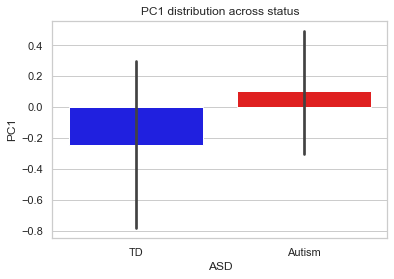

In [156]:
sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_pc1, x = 'ASD', y = 'PC1',
           palette = ['blue', 'red']
#             , scale = 'count', inner = 'box'
           )

plt.title('PC1 distribution across status')
plt.show()

Text(0.5, 1.0, 'PC2 distribution across status')

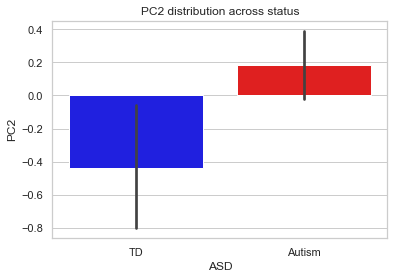

In [157]:
sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_pc1, x = 'ASD', y = 'PC2',
           palette = ['blue', 'red']
#             , scale = 'count', inner = 'box'
           )

plt.title('PC2 distribution across status')

In [158]:
loadAB = pd.DataFrame(loadings)

In [115]:
loadRDB = pd.DataFrame(loadings)

In [148]:
loadings_aims = pd.DataFrame(loadings)

SpearmanrResult(correlation=0.6669084246287742, pvalue=5.327191551678373e-10)

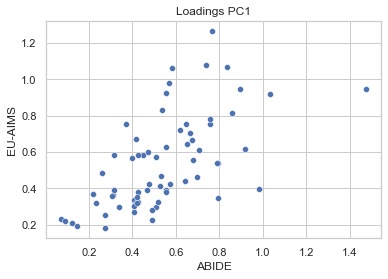

In [161]:
sns.scatterplot(x = loadAB[0], y = loadings_aims[0])
plt.title('Loadings PC1')
plt.xlabel('ABIDE')
plt.ylabel('EU-AIMS')
stats.spearmanr(loadAB[0], loadings_aims[0])

SpearmanrResult(correlation=0.401381837614994, pvalue=0.0006929083092895098)

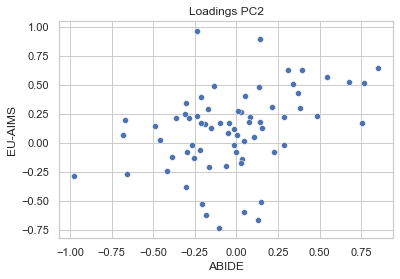

In [162]:
sns.scatterplot(x = loadAB[1], y = loadings_aims[1])
plt.title('Loadings PC2')
plt.xlabel('ABIDE')
plt.ylabel('EU-AIMS')
stats.spearmanr(loadAB[1], loadings_aims[1])

SpearmanrResult(correlation=-0.6567164179104477, pvalue=1.1935093381773078e-09)

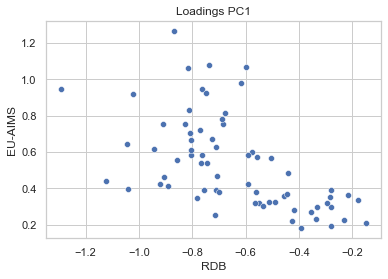

In [173]:
sns.scatterplot(x = loadRDB[0], y = loadings_aims[0])
plt.title('Loadings PC1')
plt.xlabel('RDB')
plt.ylabel('EU-AIMS')

stats.spearmanr(loadRDB[0], loadings_aims[0])


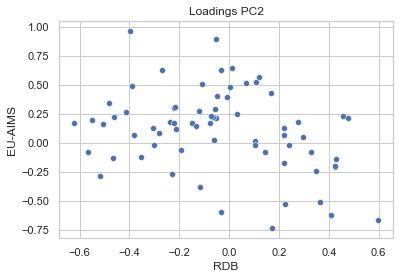

SpearmanrResult(correlation=-0.24140168721609342, pvalue=0.04734744561561437)

In [174]:
sns.scatterplot(x = loadRDB[1], y = loadings_aims[1])
plt.title('Loadings PC2')
plt.xlabel('RDB')
plt.ylabel('EU-AIMS')
plt.show()
stats.spearmanr(loadRDB[1], loadings_aims[1])

SpearmanrResult(correlation=-0.6567164179104477, pvalue=1.1935093381773078e-09)

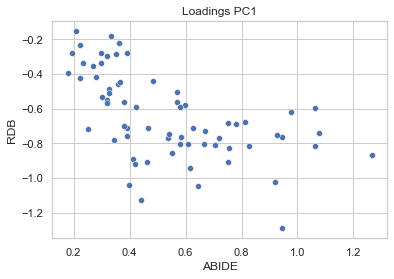

In [133]:
sns.scatterplot(x = loadAB[0], y = loadRDB[0])
plt.title('Loadings PC1')
plt.xlabel('ABIDE')
plt.ylabel('RDB')
stats.spearmanr(loadAB[0], loadRDB[0])

In [131]:
from scipy import stats
stats.spearmanr(loadAB[0], loadRDB[0])

SpearmanrResult(correlation=-0.6567164179104477, pvalue=1.1935093381773078e-09)

SpearmanrResult(correlation=-0.24140168721609342, pvalue=0.04734744561561437)

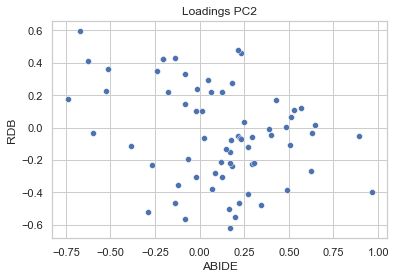

In [134]:
sns.scatterplot(x = loadAB[1], y = loadRDB[1])
plt.title('Loadings PC2')
plt.xlabel('ABIDE')
plt.ylabel('RDB')
stats.spearmanr(loadAB[1], loadRDB[1])

## Plot loadings onto brain maps

In [326]:
brain_maps(pd.DataFrame(loadings)[0])

In [327]:
brain_maps(pd.DataFrame(loadings)[1])